In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# TR: Tekrarlanabilirlik için rastgele sayı üretecini sabitleme
# EN: Setting random seed for reproducibility
np.random.seed(42)

# TR: 100 örnekli veri seti oluşturma
# EN: Creating dataset with 100 samples
n = 100
id = list(range(1, n+1))

# TR: Normal dağılımlı özellikler oluşturma
# EN: Creating features with normal distribution
yas = np.random.normal(45, 15, n).astype(float)
kilo = np.random.normal(70, 15, n).astype(float)
boy = np.random.normal(170, 10, n).astype(float)
gelir = np.random.normal(5000, 2000, n).astype(float)

# TR: Belirli eşik değerlerinin üstündekileri NaN yapma
# EN: Setting values above thresholds to NaN
yas[yas > 60] = np.nan
kilo[kilo > 90] = np.nan
boy[boy > 185] = np.nan
gelir[gelir > 8000] = np.nan

# TR: DataFrame oluşturma
# EN: Creating DataFrame
df = pd.DataFrame({
    "id":id,
    'Yaş': yas,
    'Kilo': kilo,
    'Boy': boy,
    'Gelir': gelir
})

# TR: Değerleri yuvarlamak
# EN: Rounding values
df['Yaş'] = df['Yaş'].round(0)
df['Kilo'] = df['Kilo'].round(1)
df['Boy'] = df['Boy'].round(1)
df

,id,Yaş,Kilo,Boy,Gelir
0,1,52.0,48.8,173.6,3342.009978
1,2,43.0,63.7,175.6,3879.637920
2,3,55.0,64.9,180.8,6494.587210
3,4,NaN,58.0,180.5,6220.740531
4,5,41.0,67.6,156.2,4958.196812
...,...,...,...,...,...
95,96,23.0,75.8,163.1,4061.648696
96,97,49.0,56.7,179.0,1573.730942
97,98,49.0,72.3,173.1,7707.744748
98,99,45.0,70.9,178.1,4770.920309


In [2]:
# TR: Veri setindeki eksik değerlerin sayısını hesaplama
# EN: Calculate number of missing values in dataset
print("\nEksik Değer Sayıları:")
print(df.isnull().sum())



Eksik Değer Sayıları:
id        0
Yaş      11
Kilo      9
Boy       8
Gelir     6
dtype: int64


In [3]:
# TR: Eksik değerlerin yüzdesel oranını hesaplama
# EN: Calculate percentage of missing values
print("\nEksik Değer Oranları:")
print(df.isnull().mean() * 100)


Eksik Değer Oranları:
id        0.0
Yaş      11.0
Kilo      9.0
Boy       8.0
Gelir     6.0
dtype: float64


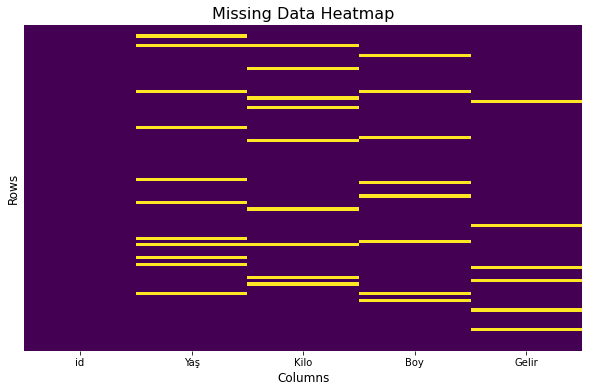

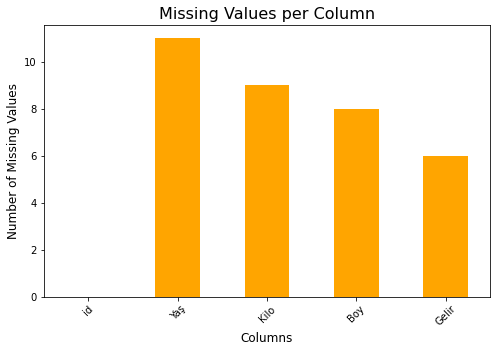

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# TR: Eksik verileri görselleştirmek için ısı haritası
# EN: Heatmap for visualizing missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Rows", fontsize=12)
plt.show()

# TR: Sütunlardaki eksik değerlerin dağılımını gösteren çubuk grafik
# EN: Bar plot showing distribution of missing values in columns
missing_count = df.isnull().sum()
plt.figure(figsize=(8, 5))
missing_count.plot(kind='bar', color='orange')
plt.title("Missing Values per Column", fontsize=16)
plt.xlabel("Columns", fontsize=12)
plt.ylabel("Number of Missing Values", fontsize=12)
plt.xticks(rotation=45)
plt.show()


In [5]:
# TR: Ortalama değer atama yöntemi ile eksik değerleri doldurma
# EN: Filling missing values using mean imputation method
df_mean_imputed = df.fillna(df.mean())

# TR: İlk 5 satırı görüntüleme
# EN: Display first 5 rows
print("\nOrtalama ile Doldurulmuş Veriler:")
print(df_mean_imputed.head())

# TR: Eksik değer kontrolü
# EN: Check missing values
print("\nEksik Değer Sayıları:")
print(df_mean_imputed.isnull().sum())

# TR: Eksik değer yüzdesi hesaplama
# EN: Calculate missing value percentages 
print("\nEksik Değer Oranları:")
print(df_mean_imputed.isnull().mean() * 100)



Ortalama ile Doldurulmuş Veriler:
   id        Yaş  Kilo    Boy        Gelir
0   1  52.000000  48.8  173.6  3342.009978
1   2  43.000000  63.7  175.6  3879.637920
2   3  55.000000  64.9  180.8  6494.587210
3   4  40.617978  58.0  180.5  6220.740531
4   5  41.000000  67.6  156.2  4958.196812

Eksik Değer Sayıları:
id       0
Yaş      0
Kilo     0
Boy      0
Gelir    0
dtype: int64

Eksik Değer Oranları:
id       0.0
Yaş      0.0
Kilo     0.0
Boy      0.0
Gelir    0.0
dtype: float64


In [6]:
# TR: KNN yöntemi ile eksik değerleri doldurma
# EN: Filling missing values using KNN method

# TR: Gerekli kütüphaneleri içe aktarma
# EN: Importing required libraries
from sklearn.impute import KNNImputer
import pandas as pd

# TR: KNN modelini oluşturma (n_neighbors=3 ile en yakın 3 komşuya bakılır)
# EN: Creating KNN model (looks at 3 nearest neighbors with n_neighbors=3)
knn_imputer = KNNImputer(n_neighbors=3)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df), columns=df.columns)

# TR: Doldurulmuş verileri ve eksik değer istatistiklerini gösterme
# EN: Showing imputed data and missing value statistics
print("\nKNN ile Doldurulmuş Veriler:")
print(df_knn_imputed.head())

print("\nEksik Değer Sayıları:")
print(df_knn_imputed.isnull().sum())

print("\nEksik Değer Oranları:")
print(df_knn_imputed.isnull().mean() * 100)



KNN ile Doldurulmuş Veriler:
    id        Yaş  Kilo    Boy        Gelir
0  1.0  52.000000  48.8  173.6  3342.009978
1  2.0  43.000000  63.7  175.6  3879.637920
2  3.0  55.000000  64.9  180.8  6494.587210
3  4.0  33.666667  58.0  180.5  6220.740531
4  5.0  41.000000  67.6  156.2  4958.196812

Eksik Değer Sayıları:
id       0
Yaş      0
Kilo     0
Boy      0
Gelir    0
dtype: int64

Eksik Değer Oranları:
id       0.0
Yaş      0.0
Kilo     0.0
Boy      0.0
Gelir    0.0
dtype: float64


In [7]:
# TR: Medyan yöntemi ile eksik değerleri doldurma
# EN: Filling missing values using median method

# TR: Gerekli kütüphaneleri içe aktarma
# EN: Importing required libraries
from sklearn.impute import KNNImputer
import numpy as np
import pandas as pd

# TR: Her sütundaki eksik değerleri medyan ile doldurma
# EN: Filling missing values with median for each column
df_knn_median_imputed = df.apply(lambda col: col.fillna(col.median()), axis=0)

# TR: Sonuçları ve eksik değer istatistiklerini gösterme
# EN: Showing results and missing value statistics
print(df_knn_median_imputed)

print("\nEksik Değer Sayıları:")
print(df_mean_imputed.isnull().sum())

print("\nEksik Değer Oranları:") 
print(df_mean_imputed.isnull().mean() * 100)


     id   Yaş  Kilo    Boy        Gelir
0     1  52.0  48.8  173.6  3342.009978
1     2  43.0  63.7  175.6  3879.637920
2     3  55.0  64.9  180.8  6494.587210
3     4  41.0  58.0  180.5  6220.740531
4     5  41.0  67.6  156.2  4958.196812
..  ...   ...   ...    ...          ...
95   96  23.0  75.8  163.1  4061.648696
96   97  49.0  56.7  179.0  1573.730942
97   98  49.0  72.3  173.1  7707.744748
98   99  45.0  70.9  178.1  4770.920309
99  100  41.0  52.9  176.3  7475.632624

[100 rows x 5 columns]

Eksik Değer Sayıları:
id       0
Yaş      0
Kilo     0
Boy      0
Gelir    0
dtype: int64

Eksik Değer Oranları:
id       0.0
Yaş      0.0
Kilo     0.0
Boy      0.0
Gelir    0.0
dtype: float64


In [8]:
# TR: Linear Interpolation yöntemi ile eksik değerleri doldurma
# EN: Filling missing values using Linear Interpolation method

# TR: Ardışık noktalar arasında doğrusal ilişki kurarak eksik değerleri tahmin eder
# EN: Predicts missing values by establishing linear relationship between consecutive points

df_interpolated = df.interpolate(method='linear', axis=0)

# TR: Sonuçları göster
# EN: Show results
print(df_interpolated)
print("\nEksik Değer Sayıları:")
print(df_mean_imputed.isnull().sum())

print("\nEksik Değer Oranları:")
print(df_mean_imputed.isnull().mean() * 100)


     id   Yaş  Kilo    Boy        Gelir
0     1  52.0  48.8  173.6  3342.009978
1     2  43.0  63.7  175.6  3879.637920
2     3  55.0  64.9  180.8  6494.587210
3     4  48.0  58.0  180.5  6220.740531
4     5  41.0  67.6  156.2  4958.196812
..  ...   ...   ...    ...          ...
95   96  23.0  75.8  163.1  4061.648696
96   97  49.0  56.7  179.0  1573.730942
97   98  49.0  72.3  173.1  7707.744748
98   99  45.0  70.9  178.1  4770.920309
99  100  41.0  52.9  176.3  7475.632624

[100 rows x 5 columns]

Eksik Değer Sayıları:
id       0
Yaş      0
Kilo     0
Boy      0
Gelir    0
dtype: int64

Eksik Değer Oranları:
id       0.0
Yaş      0.0
Kilo     0.0
Boy      0.0
Gelir    0.0
dtype: float64


In [9]:
# TR: Linear Regression kullanarak eksik değerleri tahmin etme
# EN: Predicting missing values using Linear Regression
from sklearn.linear_model import LinearRegression

df_linear_trend = df.copy()

for col in df.columns:
    # TR: Veri setindeki mevcut değerlerin konumlarını belirleme
    # EN: Determining locations of existing values in dataset
    not_null = df[col].dropna().index
    not_null_values = df[col].dropna().values
    
    # TR: Eksik değerlerin konumlarını belirleme 
    # EN: Determining locations of missing values
    missing_idx = df[col].index[df[col].isna()]
    
    if len(not_null) > 1 and len(missing_idx) > 0:
        # TR: Linear Regression modeli oluşturup eğitme
        # EN: Creating and training Linear Regression model
        model = LinearRegression()
        model.fit(np.array(not_null).reshape(-1, 1), not_null_values)
        
        # TR: Eksik değerleri tahmin edip yerlerine koyma
        # EN: Predicting missing values and placing them
        predicted_values = model.predict(np.array(missing_idx).reshape(-1, 1))
        df_linear_trend.loc[missing_idx, col] = predicted_values

print(df_linear_trend)
print("\nEksik Değer Sayıları:")
print(df_mean_imputed.isnull().sum())

print("\nEksik Değer Oranları:")
print(df_mean_imputed.isnull().mean() * 100)


     id        Yaş  Kilo    Boy        Gelir
0     1  52.000000  48.8  173.6  3342.009978
1     2  43.000000  63.7  175.6  3879.637920
2     3  55.000000  64.9  180.8  6494.587210
3     4  39.031017  58.0  180.5  6220.740531
4     5  41.000000  67.6  156.2  4958.196812
..  ...        ...   ...    ...          ...
95   96  23.000000  75.8  163.1  4061.648696
96   97  49.000000  56.7  179.0  1573.730942
97   98  49.000000  72.3  173.1  7707.744748
98   99  45.000000  70.9  178.1  4770.920309
99  100  41.000000  52.9  176.3  7475.632624

[100 rows x 5 columns]

Eksik Değer Sayıları:
id       0
Yaş      0
Kilo     0
Boy      0
Gelir    0
dtype: int64

Eksik Değer Oranları:
id       0.0
Yaş      0.0
Kilo     0.0
Boy      0.0
Gelir    0.0
dtype: float64


In [10]:
# TR: EM yöntemi ile eksik değerleri doldurma
# EN: Filling missing values with EM method

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# TR: EM algoritması ile eksik değerleri tahmin etme
# EN: Predicting missing values with EM algorithm
em_imputer = IterativeImputer()
df_em_imputed = pd.DataFrame(em_imputer.fit_transform(df), columns=df.columns)

# TR: Sonuçları göster
# EN: Show results
print(df_em_imputed)
print("\nEksik Değer Sayıları:")
print(df_mean_imputed.isnull().sum())

print("\nEksik Değer Oranları:")
print(df_mean_imputed.isnull().mean() * 100)

       id        Yaş  Kilo    Boy        Gelir
0     1.0  52.000000  48.8  173.6  3342.009978
1     2.0  43.000000  63.7  175.6  3879.637920
2     3.0  55.000000  64.9  180.8  6494.587210
3     4.0  39.925607  58.0  180.5  6220.740531
4     5.0  41.000000  67.6  156.2  4958.196812
..    ...        ...   ...    ...          ...
95   96.0  23.000000  75.8  163.1  4061.648696
96   97.0  49.000000  56.7  179.0  1573.730942
97   98.0  49.000000  72.3  173.1  7707.744748
98   99.0  45.000000  70.9  178.1  4770.920309
99  100.0  41.000000  52.9  176.3  7475.632624

[100 rows x 5 columns]

Eksik Değer Sayıları:
id       0
Yaş      0
Kilo     0
Boy      0
Gelir    0
dtype: int64

Eksik Değer Oranları:
id       0.0
Yaş      0.0
Kilo     0.0
Boy      0.0
Gelir    0.0
dtype: float64


In [11]:
# TR: Regresyon yöntemi ile eksik değerleri tahmin etme
# EN: Predicting missing values using regression method
df_regression_imputed = df.copy()

for col in df.columns:
    # TR: Eksik olmayan ve olan değerlerin indekslerini bul
    # EN: Find indices of missing and non-missing values
    not_null = df[col].dropna().index
    missing_idx = df[col].index[df[col].isna()]
    
    if len(not_null) > 1 and len(missing_idx) > 0:
        # TR: Eğitim verisi hazırlama - Eksik olmayan değerler için diğer kolonları kullan
        # EN: Prepare training data - Use other columns for non-missing values
        X_train = df.iloc[not_null].drop(columns=[col]).fillna(df.mean())
        y_train = df[col].iloc[not_null]
        
        # TR: Test verisi hazırlama - Eksik değerler için diğer kolonları kullan
        # EN: Prepare test data - Use other columns for missing values 
        X_test = df.iloc[missing_idx].drop(columns=[col]).fillna(df.mean())
        
        # TR: Linear Regression modelini eğit ve tahmin yap
        # EN: Train Linear Regression model and make predictions
        reg_model = LinearRegression()
        reg_model.fit(X_train, y_train)
        predictions = reg_model.predict(X_test)
        
        # TR: Tahmin edilen değerleri yerleştir
        # EN: Insert predicted values
        df_regression_imputed.loc[missing_idx, col] = predictions

# TR: Sonuçları göster
# EN: Show results
print(df_regression_imputed.head())
print("\nEksik Değer Sayıları:")
print(df_mean_imputed.isnull().sum())

print("\nEksik Değer Oranları:") 
print(df_mean_imputed.isnull().mean() * 100)


   id        Yaş  Kilo    Boy        Gelir
0   1  52.000000  48.8  173.6  3342.009978
1   2  43.000000  63.7  175.6  3879.637920
2   3  55.000000  64.9  180.8  6494.587210
3   4  42.137463  58.0  180.5  6220.740531
4   5  41.000000  67.6  156.2  4958.196812

Eksik Değer Sayıları:
id       0
Yaş      0
Kilo     0
Boy      0
Gelir    0
dtype: int64

Eksik Değer Oranları:
id       0.0
Yaş      0.0
Kilo     0.0
Boy      0.0
Gelir    0.0
dtype: float64


In [12]:
# Çoklu Atama Yöntemi (Multiple Imputation)
# TR: Eksik değerleri birden fazla simüle edilmiş değerle dolduran istatistiksel bir yöntem
# EN: Statistical method that fills missing values with multiple simulated values

# TR: IterativeImputer ile MICE algoritmasını kullanarak eksik değerleri dolduruyoruz
# EN: Using IterativeImputer with MICE algorithm to fill missing values
multiple_imputer = IterativeImputer(max_iter=10, random_state=0)
df_multiple_imputed = pd.DataFrame(multiple_imputer.fit_transform(df), columns=df.columns)
print(df_multiple_imputed)

# TR: Eksik değer istatistiklerini yazdır
# EN: Print missing value statistics
print("\nEksik Değer Sayıları:")
print(df_mean_imputed.isnull().sum())

print("\nEksik Değer Oranları:")
print(df_mean_imputed.isnull().mean() * 100)


       id        Yaş  Kilo    Boy        Gelir
0     1.0  52.000000  48.8  173.6  3342.009978
1     2.0  43.000000  63.7  175.6  3879.637920
2     3.0  55.000000  64.9  180.8  6494.587210
3     4.0  39.925607  58.0  180.5  6220.740531
4     5.0  41.000000  67.6  156.2  4958.196812
..    ...        ...   ...    ...          ...
95   96.0  23.000000  75.8  163.1  4061.648696
96   97.0  49.000000  56.7  179.0  1573.730942
97   98.0  49.000000  72.3  173.1  7707.744748
98   99.0  45.000000  70.9  178.1  4770.920309
99  100.0  41.000000  52.9  176.3  7475.632624

[100 rows x 5 columns]

Eksik Değer Sayıları:
id       0
Yaş      0
Kilo     0
Boy      0
Gelir    0
dtype: int64

Eksik Değer Oranları:
id       0.0
Yaş      0.0
Kilo     0.0
Boy      0.0
Gelir    0.0
dtype: float64


In [13]:
# TR: Farklı atama yöntemleriyle doldurulmuş verileri bir sözlükte toplama
# EN: Collecting data filled with different imputation methods in a dictionary
imputed_data = {
    "Original Data": df.head(),                           # TR: Orijinal veri
    "Mean Imputation": df_mean_imputed.head(),           # TR: Ortalama ile doldurma
    "KNN Imputation": df_knn_imputed.head(),            # TR: KNN algoritması ile doldurma  
    "KNN Median Imputation": df_knn_median_imputed.head(), # TR: KNN medyan ile doldurma
    "Linear Interpolation": df_interpolated.head(),      # TR: Doğrusal interpolasyon ile doldurma
    "Linear Trend Extrapolation": df.head(),            # TR: Doğrusal trend ile doldurma
    "EM Imputation": df_em_imputed.head(),              # TR: EM algoritması ile doldurma
    "Regression Imputation": df_regression_imputed.head(), # TR: Regresyon ile doldurma
    "Multiple Imputation": df_multiple_imputed.head()    # TR: Çoklu atama ile doldurma
}

# TR: Her bir yöntem için doldurulmuş verileri yazdırma
# EN: Printing filled data for each method
for key, value in imputed_data.items():
    print(f"{key}:\n", value, "\n")

Original Data:
    id   Yaş  Kilo    Boy        Gelir
0   1  52.0  48.8  173.6  3342.009978
1   2  43.0  63.7  175.6  3879.637920
2   3  55.0  64.9  180.8  6494.587210
3   4   NaN  58.0  180.5  6220.740531
4   5  41.0  67.6  156.2  4958.196812 

Mean Imputation:
    id        Yaş  Kilo    Boy        Gelir
0   1  52.000000  48.8  173.6  3342.009978
1   2  43.000000  63.7  175.6  3879.637920
2   3  55.000000  64.9  180.8  6494.587210
3   4  40.617978  58.0  180.5  6220.740531
4   5  41.000000  67.6  156.2  4958.196812 

KNN Imputation:
     id        Yaş  Kilo    Boy        Gelir
0  1.0  52.000000  48.8  173.6  3342.009978
1  2.0  43.000000  63.7  175.6  3879.637920
2  3.0  55.000000  64.9  180.8  6494.587210
3  4.0  33.666667  58.0  180.5  6220.740531
4  5.0  41.000000  67.6  156.2  4958.196812 

KNN Median Imputation:
    id   Yaş  Kilo    Boy        Gelir
0   1  52.0  48.8  173.6  3342.009978
1   2  43.0  63.7  175.6  3879.637920
2   3  55.0  64.9  180.8  6494.587210
3   4  41.0  58.0

In [17]:
# TR: Farklı yöntemlerle doldurulmuş eksik değerleri karşılaştıran tablo oluşturma
# EN: Creating a comparison table for missing values filled with different methods
import pandas as pd
import numpy as np

# TR: Her sütunu kontrol ederek eksik değerleri bulma
# EN: Finding missing values by checking each column
for column in df.columns:
    # TR: Eksik değerleri olan satırları seçme
    # EN: Selecting rows with missing values
    missing_rows = df[df[column].isnull()]
    
    if not missing_rows.empty:
        print(f"\n{column} sütunundaki eksik değerler için tahminler:")
        # TR: Farklı yöntemlerle doldurulmuş değerleri karşılaştırma tablosu oluşturma
        # EN: Creating comparison table for values filled with different methods
        comparison_df = pd.DataFrame({
            'ID': missing_rows.index,
            'Orijinal Veri': missing_rows[column],
            'Ortalama ile': df_mean_imputed.loc[missing_rows.index, column],
            'KNN ile': df_knn_imputed.loc[missing_rows.index, column],
            'Medyan ile': df_knn_median_imputed.loc[missing_rows.index, column],
            'Doğrusal Interpolasyon': df_interpolated.loc[missing_rows.index, column],
            'Regresyon ile': df_regression_imputed.loc[missing_rows.index, column],
            'EM Algoritması': df_em_imputed.loc[missing_rows.index, column],
            'Çoklu Atama': df_multiple_imputed.loc[missing_rows.index, column]
        })
        print(comparison_df)


Yaş sütunundaki eksik değerler için tahminler:
    ID  Orijinal Veri  Ortalama ile    KNN ile  Medyan ile  \
3    3            NaN     40.617978  33.666667        41.0   
6    6            NaN     40.617978  28.333333        41.0   
20  20            NaN     40.617978  35.666667        41.0   
31  31            NaN     40.617978  24.000000        41.0   
47  47            NaN     40.617978  37.333333        41.0   
54  54            NaN     40.617978  26.666667        41.0   
65  65            NaN     40.617978  31.333333        41.0   
67  67            NaN     40.617978  31.333333        41.0   
71  71            NaN     40.617978  34.000000        41.0   
73  73            NaN     40.617978  31.333333        41.0   
82  82            NaN     40.617978  45.333333        41.0   

    Doğrusal Interpolasyon  Regresyon ile  EM Algoritması  Çoklu Atama  
3                     48.0      42.137463       39.925607    39.925607  
6                     49.0      39.085735       39.166888    